# Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 6.1 DataFrame with the Closing Prices of 30 Different Stocks, 10 from each Caps 

In [48]:
import glob

path = r'/home/samthekiller/Downloads/intenship/work/module_6' # use your path
all_files = glob.glob(path + "/*.csv")

In [49]:
len(all_files)

30

In [50]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df['Close Price'])

In [51]:
x = np.reshape(list, (100, 28)).T

NameError: name 'list_data' is not defined

In [54]:
df=pd.DataFrame(li)

In [56]:
df=df.transpose()

In [60]:
df=df.dropna()

In [61]:
df.shape

(494, 30)

## 6.2 Average Annual Percentage Return and Volatility of all 30 stocks over a theoretical one year period 

In [126]:
import math

In [104]:
daily_returns=df.pct_change(fill_method='ffill')

In [105]:
daily_returns=daily_returns.dropna()

In [127]:
mean_daily_returns = math.log(daily_returns.mean()*100)

TypeError: cannot convert the series to <class 'float'>

In [118]:
std_daily_returns = math.log(daily_returns.std()*100)

In [119]:
mean_daily_returns=mean_daily_returns.values.reshape(-1,1)

In [120]:
std_daily_returns=std_daily_returns.values.reshape(-1,1)

In [121]:
X_tr=pd.DataFrame(mean_daily_returns,std_daily_returns)

In [122]:
from sklearn.cluster import KMeans

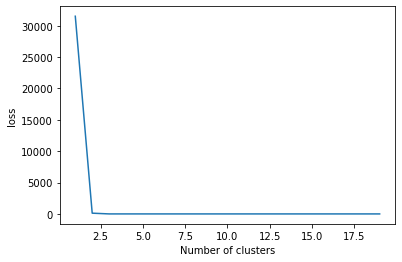

In [124]:
loss = []
for k in range(1,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_tr)
    loss.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1,20),loss)
plt.xlabel("Number of clusters")
plt.ylabel("loss")
plt.show()

In [111]:
best_k=5

In [112]:
kmeans = KMeans(n_clusters=best_k)
kmeans.fit(X_tr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [113]:
kmeans.labels_

array([3, 3, 3, 0, 0, 4, 3, 0, 3, 0, 0, 3, 4, 0, 0, 0, 1, 3, 0, 4, 3, 3,
       4, 2, 0, 3, 3, 0, 3, 4], dtype=int32)

In [110]:
std_daily_returns*100

Close Price      1.857913
Close Price      2.790477
Close Price      2.747646
Close Price      1.686149
Close Price      1.601201
Close Price      3.797721
Close Price      2.092483
Close Price      1.875195
Close Price      2.655094
Close Price      1.656651
Close Price      1.955617
Close Price      3.936208
Close Price      2.534967
Close Price      2.131875
Close Price      1.319133
Close Price      1.948904
Close Price    271.634091
Close Price      1.684622
Close Price      2.428373
Close Price      2.022486
Close Price      2.229924
Close Price      2.812470
Close Price      1.750578
Close Price     53.067450
Close Price      3.830012
Close Price      2.363971
Close Price      3.324579
Close Price      3.018480
Close Price      1.868053
Close Price      3.845991
dtype: float64